In [1]:
#Abhängigkeiten
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
#Daten laden
#strip_1 enthält keine near Einträge mit 1.0?
strip = pd.read_csv('data/train/strip_3_train.csv', sep=',')

In [3]:
#Ersten paar Einträge des Datensatzes ausgeben
strip.head()

,frame_number,strip_id,node_id,timestamp,run_number,ax,ay,az,gx,gy,gz,mx,my,mz,r,near,vicon_x,vicon_y
0,0,3,1,2020-08-05 14:01:18.984,0,-0.002945,0.000731,-0.000471,-0.003762,0.121539,0.253784,0.382613,0.021392,-0.221057,NaN,0.0,-9.986354,4.972623
1,0,3,2,2020-08-05 14:01:18.931,0,0.003222,0.000548,-0.004903,0.276534,-0.053331,0.004065,0.805318,-0.289757,0.761046,-86.0,0.0,-9.986354,4.972623
2,0,3,3,2020-08-05 14:01:19.038,0,0.001292,0.002014,-0.000209,-0.075876,0.188471,-0.045029,0.729485,2.356819,0.337127,-85.0,0.0,-9.986354,4.972623
3,0,3,4,2020-08-05 14:01:18.869,0,0.002646,0.001947,0.003010,-0.027558,-0.018787,-0.108288,-0.836178,0.027348,0.555749,-86.0,0.0,-9.986354,4.972623
4,0,3,5,2020-08-05 14:01:18.995,0,0.000098,0.000989,0.001032,-0.141565,0.071970,0.113878,-0.097138,-1.025881,0.192381,-83.0,0.0,-9.986354,4.972623


In [4]:
strip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350940 entries, 0 to 350939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   frame_number  350940 non-null  int64  
 1   strip_id      350940 non-null  int64  
 2   node_id       350940 non-null  int64  
 3   timestamp     350940 non-null  object 
 4   run_number    350940 non-null  int64  
 5   ax            350940 non-null  float64
 6   ay            350940 non-null  float64
 7   az            350940 non-null  float64
 8   gx            350940 non-null  float64
 9   gy            350940 non-null  float64
 10  gz            350940 non-null  float64
 11  mx            350940 non-null  float64
 12  my            350940 non-null  float64
 13  mz            350940 non-null  float64
 14  r             187587 non-null  float64
 15  near          350940 non-null  float64
 16  vicon_x       350940 non-null  float64
 17  vicon_y       350940 non-null  float64
dtypes: f

In [5]:
strip['near'].value_counts()

0.0    336300
1.0     14640
Name: near, dtype: int64

/home/monoflop/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='near', ylabel='count'>

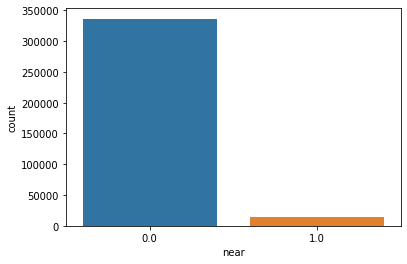

In [6]:
sns.countplot(strip['near'])

In [7]:
#Label aus Datensatz entfernen, damit wir einen Label-Satz und einen Feature-Satz erhalten.
X = strip.drop('near',axis = 1)
Y = strip['near']

#Alle nicht Sensordaten entfernen
X = X.drop('frame_number',axis = 1)
X = X.drop('strip_id',axis = 1)
X = X.drop('node_id',axis = 1)
X = X.drop('timestamp',axis = 1)
X = X.drop('run_number',axis = 1)
X = X.drop('vicon_x',axis = 1)
X = X.drop('vicon_y',axis = 1)

#NaN Werte normalisieren
X = X.fillna(X.mean())

In [8]:
#Training- und Test-Splits erstellen
#75% Trainingsdaten und 25% Testdaten
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
#Daten einheitlich skalieren von z. B. 0.0 - 1.0
#TODO
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Random Forest
forest = RandomForestClassifier(n_estimators=200, random_state = 0)
forest.fit(X_train, Y_train)
forest_prediction = forest.predict(X_test)

In [18]:
#Random Forest Model Report
print(classification_report(Y_test, forest_prediction))
print(confusion_matrix(Y_test, forest_prediction))
print("\nAccuracy = " + str(accuracy_score(Y_test, forest_prediction)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     84084
         1.0       0.75      0.19      0.30      3651

    accuracy                           0.96     87735
   macro avg       0.86      0.59      0.64     87735
weighted avg       0.96      0.96      0.95     87735

[[83851   233]
 [ 2961   690]]

Accuracy = 0.9635949165099447


In [12]:
#Support Vector Model
#clf = svm.SVC()
#clf.fit(X_train, Y_train)
#clf_prediction = clf.predict(X_test)

In [13]:
#Support Vector Model Report
#print(classification_report(Y_test, clf_prediction))
#print(confusion_matrix(Y_test, clf_prediction))